In [41]:
import nltk
nltk.download('gutenberg')
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('treebank')
from nltk.corpus import stopwords,treebank
from nltk.stem import *
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import gutenberg
import pandas as pd

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_d

### Gutenberg Corpus

In [42]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [43]:
gutenberg.raw('austen-emma.txt')

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

In [44]:
gutenberg.sents('austen-emma.txt')[0:20]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [45]:
gutenberg.words('austen-emma.txt')[0:20]

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich']

In [46]:
def frequency_count(preped_text,word_freq={}):
    for i  in preped_text:
        if i in word_freq.keys():
            word_freq[i] += 1
        else:
            word_freq[i] = 0
    word_freq = dict(sorted(word_freq.items(), key=lambda item: (item[1],item[0]),reverse=True))
    return word_freq

In [47]:
gutenberg_data = {}
for book in gutenberg.fileids():
    words = gutenberg.words(book)
    punctuation = [',', '.', "\'", '-', "'s", '"', "``", "''", "!", "[", "]", '.--', ":", ";"]
    clean_words = [i.lower() for i in words if i not in punctuation]
    num_raw = len(gutenberg.raw(book))
    num_sentences = len(gutenberg.sents(book))
    num_words = len(clean_words)
    vocab = list(set(clean_words))
    num_vocab = len(vocab)
    avg_char_per_word = round((num_raw / num_words))
    ttr = (num_vocab/num_words)*100
    gutenberg_data[book] = {
        "characters": num_raw,
        "sentences": num_sentences,
        "words": num_words,
        "vocab": num_vocab,
        "ttr": ttr,
        "Avg Char per Word": avg_char_per_word
    }

In [48]:
gutenberg_data = pd.DataFrame(gutenberg_data)
gutenberg_data

,austen-emma.txt,austen-persuasion.txt,austen-sense.txt,bible-kjv.txt,blake-poems.txt,bryant-stories.txt,burgess-busterbrown.txt,carroll-alice.txt,chesterton-ball.txt,chesterton-brown.txt,chesterton-thursday.txt,edgeworth-parents.txt,melville-moby_dick.txt,milton-paradise.txt,shakespeare-caesar.txt,shakespeare-hamlet.txt,shakespeare-macbeth.txt,whitman-leaves.txt
characters,887071.000000,466292.00000,673022.000000,4.332554e+06,38153.000000,249439.000000,84663.000000,144395.000000,457450.000000,406629.000000,320525.000000,935158.000000,1.242990e+06,468220.000000,112310.00000,162881.000000,100351.000000,711215.000000
sentences,7752.000000,3747.00000,4999.000000,3.010300e+04,438.000000,2863.000000,1054.000000,1703.000000,4779.000000,3806.000000,3742.000000,10230.000000,1.005900e+04,1851.000000,2163.00000,3106.000000,1907.000000,4250.000000
words,166891.000000,85384.00000,123517.000000,8.577900e+05,7064.000000,47819.000000,16576.000000,28867.000000,85154.000000,75268.000000,60460.000000,176873.000000,2.229780e+05,81090.000000,21241.00000,30847.000000,18664.000000,129541.000000
vocab,7333.000000,5824.00000,6392.000000,1.275800e+04,1525.000000,3930.000000,1549.000000,2624.000000,8324.000000,7783.000000,6338.000000,8436.000000,1.722000e+04,9010.000000,3023.00000,4707.000000,3455.000000,12442.000000
ttr,4.393886,6.82095,5.174996,1.487310e+00,21.588335,8.218491,9.344836,9.089964,9.775231,10.340384,10.482964,4.769524,7.722735e+00,11.111111,14.23191,15.259182,18.511573,9.604681
Avg Char per Word,5.000000,5.00000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000e+00,6.000000,5.00000,5.000000,5.000000,5.000000


In [49]:
def books_data(corp):
    full_data = {}
    for book in corp.fileids():
        words = corp.words(book)
        punctuation = [',', '.', "\'", '-', "'s", '"', "``", "''", "!", "[", "]", '.--', ":", ";"]
        clean_words = [i.lower() for i in words if i not in punctuation]
        num_raw = len(corp.raw(book))
        num_sentences = len(corp.sents(book))
        num_words = len(clean_words)
        vocab = list(set(clean_words))
        num_vocab = len(vocab)
        avg_char_per_word = round((num_raw / num_words))
        ttr = (num_vocab/num_words)*100
        full_data[book] = {
            "characters": num_raw,
            "sentences": num_sentences,
            "words": num_words,
            "vocab": num_vocab,
            "ttr": ttr,
            "Avg Char per Word": avg_char_per_word
        }
    return pd.DataFrame(full_data)

In [50]:
books_data(corp=gutenberg)

,austen-emma.txt,austen-persuasion.txt,austen-sense.txt,bible-kjv.txt,blake-poems.txt,bryant-stories.txt,burgess-busterbrown.txt,carroll-alice.txt,chesterton-ball.txt,chesterton-brown.txt,chesterton-thursday.txt,edgeworth-parents.txt,melville-moby_dick.txt,milton-paradise.txt,shakespeare-caesar.txt,shakespeare-hamlet.txt,shakespeare-macbeth.txt,whitman-leaves.txt
characters,887071.000000,466292.00000,673022.000000,4.332554e+06,38153.000000,249439.000000,84663.000000,144395.000000,457450.000000,406629.000000,320525.000000,935158.000000,1.242990e+06,468220.000000,112310.00000,162881.000000,100351.000000,711215.000000
sentences,7752.000000,3747.00000,4999.000000,3.010300e+04,438.000000,2863.000000,1054.000000,1703.000000,4779.000000,3806.000000,3742.000000,10230.000000,1.005900e+04,1851.000000,2163.00000,3106.000000,1907.000000,4250.000000
words,166891.000000,85384.00000,123517.000000,8.577900e+05,7064.000000,47819.000000,16576.000000,28867.000000,85154.000000,75268.000000,60460.000000,176873.000000,2.229780e+05,81090.000000,21241.00000,30847.000000,18664.000000,129541.000000
vocab,7333.000000,5824.00000,6392.000000,1.275800e+04,1525.000000,3930.000000,1549.000000,2624.000000,8324.000000,7783.000000,6338.000000,8436.000000,1.722000e+04,9010.000000,3023.00000,4707.000000,3455.000000,12442.000000
ttr,4.393886,6.82095,5.174996,1.487310e+00,21.588335,8.218491,9.344836,9.089964,9.775231,10.340384,10.482964,4.769524,7.722735e+00,11.111111,14.23191,15.259182,18.511573,9.604681
Avg Char per Word,5.000000,5.00000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000e+00,6.000000,5.00000,5.000000,5.000000,5.000000


### Brown Corpus

In [51]:
from nltk.corpus import brown

In [52]:
brown.fileids()[0:5]

['ca01', 'ca02', 'ca03', 'ca04', 'ca05']

In [53]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [54]:
for i in brown.fileids()[0:5]:
    raw = brown.raw(i)
    print(raw)



	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.


	The/at jury/nn further/rbr said/vbd in/in term-end/nn presentments/nns that/cs the/at City/nn-tl Executive/jj-tl Committee/nn-tl ,/, which/wdt had/hvd over-all/jj charge/nn of/in the/at election/nn ,/, ``/`` deserves/vbz the/at praise/nn and/cc thanks/nns of/in the/at City/nn-tl of/in-tl Atlanta/np-tl ''/'' for/in the/at manner/nn in/in which/wdt the/at election/nn was/bedz conducted/vbn ./.


	The/at September-October/np term/nn jury/nn had/hvd been/ben charged/vbn by/in Fulton/np-tl Superior/jj-tl Court/nn-tl Judge/nn-tl Durwood/np Pye/np to/to investigate/vb reports/nns of/in possible/jj ``/`` irregularities/nns ''/'' in/in the/at hard-fought/jj primary/nn which/wdt was/bedz won/vbn by/in Mayor-nominate/nn-tl Ivan/np Allen/np Jr./

In [55]:
brown.sents()

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [56]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [57]:
books_data(corp=brown)

,ca01,ca02,ca03,ca04,ca05,ca06,ca07,ca08,ca09,ca10,...,cp29,cr01,cr02,cr03,cr04,cr05,cr06,cr07,cr08,cr09
characters,20187.00000,20357.000000,20214.000000,20608.00000,19748.00000,20137.000000,20921.000000,19599.000000,20331.000000,20128.000000,...,20610.000000,19520.00000,20024.000000,21655.000000,18564.000000,20456.000000,20097.000000,19973.000000,20608.000000,19645.000000
sentences,98.00000,98.000000,112.000000,88.00000,84.00000,99.000000,120.000000,101.000000,113.000000,106.000000,...,150.000000,113.00000,113.000000,92.000000,118.000000,141.000000,123.000000,184.000000,70.000000,99.000000
words,1998.00000,2024.000000,2043.000000,2032.00000,2040.00000,2014.000000,2040.000000,2013.000000,2025.000000,2031.000000,...,2023.000000,2029.00000,2040.000000,2194.000000,2038.000000,2068.000000,2055.000000,2059.000000,2046.000000,2028.000000
vocab,795.00000,861.000000,768.000000,843.00000,713.00000,787.000000,833.000000,774.000000,839.000000,832.000000,...,905.000000,841.00000,813.000000,977.000000,721.000000,821.000000,781.000000,675.000000,1029.000000,1027.000000
ttr,39.78979,42.539526,37.591777,41.48622,34.95098,39.076465,40.833333,38.450075,41.432099,40.965042,...,44.735541,41.44899,39.852941,44.530538,35.377821,39.700193,38.004866,32.782904,50.293255,50.641026
Avg Char per Word,10.00000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.00000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [58]:
# text = Text(brown.words(fileids='ca01'))
# text.concordance([i for i in text])

In [59]:
full_data = {}
for i in brown.categories():
    words = brown.words(categories=i)
    num_words = len(words)
    sentences = brown.sents(categories=i)
    num_sentences = len(sentences)
    vocab = list(set(vocab))
    num_vocab = len(vocab)
    freq_dist = nltk.FreqDist(word.lower() for word in words)
    full_data[i] = {
        "sentences": num_sentences,
        "words": num_words,
        "vocab": num_vocab,
        "freq_dist": freq_dist
    }

In [60]:
full_data = pd.DataFrame(full_data)
full_data

,adventure,belles_lettres,editorial,fiction,government,hobbies,humor,learned,lore,mystery,news,religion,reviews,romance,science_fiction
sentences,4637,7209,2997,4249,3032,4193,1053,7734,4881,3886,4623,1716,1751,4431,948
words,69342,173096,61604,68488,70117,82345,21695,181888,110299,57169,100554,39399,40704,70022,14470
vocab,12442,12442,12442,12442,12442,12442,12442,12442,12442,12442,12442,12442,12442,12442,12442
freq_dist,"{'dan': 23, 'morgan': 28, 'told': 46, 'himself...","{'northern': 14, 'liberals': 15, 'are': 649, '...","{'assembly': 18, 'session': 11, 'brought': 8, ...","{'thirty-three': 2, 'scotty': 32, 'did': 123, ...","{'the': 4621, 'office': 28, 'of': 3059, 'busin...","{'too': 58, 'often': 34, 'a': 1858, 'beginning...","{'it': 210, 'was': 276, 'among': 7, 'these': 1...","{'1': 241, '.': 6773, 'introduction': 15, 'it'...","{'in': 2196, 'american': 81, 'romance': 2, ','...","{'there': 232, 'were': 157, 'thirty-eight': 1,...","{'the': 6386, 'fulton': 14, 'county': 61, 'gra...","{'as': 314, 'a': 694, 'result': 13, ',': 1913,...","{'it': 269, 'is': 513, 'not': 156, 'news': 5, ...","{'they': 237, 'neither': 8, 'liked': 12, 'nor'...","{'now': 27, 'that': 131, 'he': 191, 'knew': 11..."


##### Colocation in Brown corpus

In [61]:
from nltk.collocations import *

In [72]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
finder = BigramCollocationFinder.from_words(brown.words('ca01'))
finder.nbest(bigram_measures.pmi, 20)

[('1,119', 'votes'),
 ('1962', "governor's"),
 ('637', 'E.'),
 ('Alpharetta', 'prison'),
 ('Bar', 'Association'),
 ("Caldwell's", 'resignation'),
 ('Chairman', 'James'),
 ("Commissioner's", 'Office'),
 ('Congress', 'does'),
 ("Department's", 'handling'),
 ('Durwood', 'Pye'),
 ('Everything', 'went'),
 ('Garland', "Byrd's"),
 ('George', 'P.'),
 ('Grady', 'Hospital'),
 ('Grand', 'Jury'),
 ('Henry', 'L.'),
 ('J.', 'M.'),
 ('James', 'W.'),
 ('John', 'Tower')]

### Web-HTML document

In [63]:
import requests
from bs4 import BeautifulSoup
from nltk.text import Text

In [64]:
url = 'https://www.ibm.com/topics/deep-learning#What+is+deep+learning?'
page = requests.get(url)
page

<Response [200]>

In [65]:
page.text

'\n<!DOCTYPE HTML>\n<html lang="en-us">\n<head>\n    \n    \n    \n    <meta charset="UTF-8"/>\n    <meta name="languageCode" content="en"/>\n    <meta name="countryCode" content="us"/>\n    <meta name="focusArea" content="Cloud - Automation - All"/>\n    <title>What is Deep Learning? | IBM</title>\n\t<link rel="icon" href="/content/dam/adobe-cms/default-images/favicon.svg"/>\n    \n    <meta name="description" content="Deep learning simulates our brain, helping systems learn to identify objects and perform complex tasks with increasing accuracy without human intervention."/>\n    <meta name="template" content="learn"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1"/>\n    <meta name="robots" content="index, follow"/>\n    <link rel="canonical" href="https://www.ibm.com/topics/deep-learning"/>\n    <style id="anti-flicker-style">\n        :not(:defined) {\n          display: none;\n        }\n    </style>\n    <script type="text/javascript" id="anti-flicker-sc

In [66]:
soup = BeautifulSoup(page.text, 'html.parser')

In [67]:
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="en-us">
 <head>
  <meta charset="utf-8"/>
  <meta content="en" name="languageCode"/>
  <meta content="us" name="countryCode"/>
  <meta content="Cloud - Automation - All" name="focusArea"/>
  <title>
   What is Deep Learning? | IBM
  </title>
  <link href="/content/dam/adobe-cms/default-images/favicon.svg" rel="icon"/>
  <meta content="Deep learning simulates our brain, helping systems learn to identify objects and perform complex tasks with increasing accuracy without human intervention." name="description"/>
  <meta content="learn" name="template"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <link href="https://www.ibm.com/topics/deep-learning" rel="canonical"/>
  <style id="anti-flicker-style">
   :not(:defined) {
          display: none;
        }
  </style>
  <script id="anti-flicker-script" type="text/javascript">
   (async () => {
          await customElements.whenDefined('

In [68]:
text_data = soup.find_all('p')[4].get_text() + soup.find_all('p')[5].get_text() 
text_data

'Machine learning algorithms leverage structured, labeled data to make predictions—meaning that specific features are defined from the input data for the model and organized into tables. This doesn’t necessarily mean that it doesn’t use unstructured data; it just means that if it does, it generally goes through some pre-processing to organize it into a structured format.Deep learning eliminates some of data pre-processing that is typically involved with machine learning. These algorithms can ingest and process unstructured data, like text and images,\xa0and it automates feature extraction, removing some of the dependency on human experts. For example, let’s say that we had a set of photos of different pets, and we wanted to categorize by “cat”, “dog”, “hamster”, et cetera. Deep learning algorithms can determine which features (e.g. ears) are most important to distinguish each animal from another. In machine learning, this hierarchy of features is established manually by a human expert.

In [69]:
# words = word_tokenize(text_data)
# words

In [74]:
def text_preprocessing(text,lemmed=True,remove_stop_words=True):
    lower_text = text.lower()
    tokinized_words = nltk.word_tokenize(lower_text)
    punctuation = [',','.',"\'",'-',"'s",'"',"``","''",";",'’']
    clean_words = [i for i in tokinized_words if i not in punctuation]
    stop_words = stopwords.words('english')
    relavent_words = [word for word in clean_words if word not in stop_words]
    if lemmed:
        lemmer = PorterStemmer()
        lemmed_words = [lemmer.stem(word) for word in relavent_words]    
        return lemmed_words
    return relavent_words 

In [75]:
words = text_preprocessing(text_data, lemmed=False)
words

['machine',
 'learning',
 'algorithms',
 'leverage',
 'structured',
 'labeled',
 'data',
 'make',
 'predictions—meaning',
 'specific',
 'features',
 'defined',
 'input',
 'data',
 'model',
 'organized',
 'tables',
 'necessarily',
 'mean',
 'use',
 'unstructured',
 'data',
 'means',
 'generally',
 'goes',
 'pre-processing',
 'organize',
 'structured',
 'format.deep',
 'learning',
 'eliminates',
 'data',
 'pre-processing',
 'typically',
 'involved',
 'machine',
 'learning',
 'algorithms',
 'ingest',
 'process',
 'unstructured',
 'data',
 'like',
 'text',
 'images',
 'automates',
 'feature',
 'extraction',
 'removing',
 'dependency',
 'human',
 'experts',
 'example',
 'let',
 'say',
 'set',
 'photos',
 'different',
 'pets',
 'wanted',
 'categorize',
 '“',
 'cat',
 '”',
 '“',
 'dog',
 '”',
 '“',
 'hamster',
 '”',
 'et',
 'cetera',
 'deep',
 'learning',
 'algorithms',
 'determine',
 'features',
 '(',
 'e.g',
 'ears',
 ')',
 'important',
 'distinguish',
 'animal',
 'another',
 'machine',
 'l

In [76]:
Text(text_data).concordance(['learning'])

no matches


### Local saved text file

In [77]:
path = 'sample_corpus.txt'
with open(path,"r") as f:
        f.seek(0)
        file_data = f.read()
        
file_data

'Hello there, this is a sample text! This is located locally on the device in the same directory.'

In [78]:
words = text_preprocessing(file_data, lemmed=False)
words

['hello', 'sample', 'text', '!', 'located', 'locally', 'device', 'directory']

In [79]:
from wordcloud import WordCloud,STOPWORDS
#create stop words 
stopwords = set(STOPWORDS)
#call the wordcloud Constructor 
WC = WordCloud(stopwords=stopwords,max_words=25,background_color="white").generate(file_data)

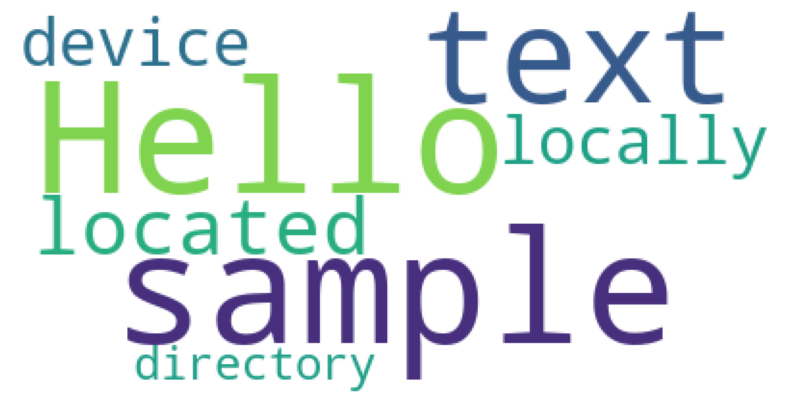

In [80]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,5)
plt.imshow(WC)
plt.axis("off")
plt.show()